# Проект "Рынок заведений общественного питания Москвы"

# Описание проекта

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

Партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

# Задачи

* Исследовать соотношение видов объектов общественного питания по количеству.
* Исследовать соотношение сетевых и несетевых заведений по количеству.
* Определить для какого вида объекта общественного питания характерно сетевое распространение.
* Определить что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
* Рассчитать для каждого вида объекта общественного питания среднее количество посадочных мест. Определить какой вид предоставляет в среднем самое большое количество посадочных мест?
* Построить график топ-10 улиц по количеству объектов общественного питания. Обозначить в каких районах Москвы находятся эти улицы.
* Найти число улиц с одним объектом общественного питания. Обозначить в каких районах Москвы находятся эти улицы.
* Дать рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментировать возможность развития сети.
* Подготовить презентацию исследования для инвесторов. 

# Описание данных

Таблица rest_data:
- `id` — идентификатор объекта;
- `object_name` — название объекта общественного питания;
- `chain` — сетевой ресторан;
- `object_type` — тип объекта общественного питания;
- `address` — адрес;
- `number` — количество посадочных мест.

##  Загрузка и подготовка данных

### Загрузка данных

In [1]:
# импортируем нужные библиотеки
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

In [2]:
# загружаем данные в переменную
data = pd.read_csv('/datasets/rest_data.csv')

### Получение первичной информации о данных

In [3]:
# функция для вывода информации о данных
def table_info (df):
    print('___________ Датафрейм ____________')
    display(df.head())
    display(df.describe())
    print('')
    print('___________Информация о датафрейме___________')
    print('')
    print(df.info())
    print('')
    print('Количество дубликатов: ' + str(df.duplicated().sum()))
    print('')

In [4]:
table_info(data)

___________ Датафрейм ____________


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000



___________Информация о датафрейме___________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB
None

Количество дубликатов: 0



В данных нет пропусков и явных дубликатов.

### Проверка данных

In [5]:
# Проверяем названия объектов общественного питания
data['object_name'].value_counts()

Столовая                                                  267
Кафе                                                      236
Шаурма                                                    234
KFC                                                       155
Шоколадница                                               142
                                                         ... 
Ирланский бар Сильверс                                      1
Хинкальная Батони                                           1
Столовая при пансионате «Коньково» для ветеранов войны      1
Кальянная Loft 24                                           1
ФГБУ Комбинат питания Кремлевский                           1
Name: object_name, Length: 10393, dtype: int64

In [6]:
# Проверяем колонку с обозначением сетевого ресторана
data['chain'].value_counts()

нет    12398
да      2968
Name: chain, dtype: int64

In [7]:
# Проверяем колонку типа объекта общественного питания
data['object_type'].value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

In [8]:
# Проверяем колонку с обозначением количества посадочных мест.
data['number'].value_counts()

0      1621
40      835
20      727
30      685
10      644
       ... 
172       1
520       1
680       1
760       1
495       1
Name: number, Length: 315, dtype: int64

Обнаруживаем - 0 посадочных мест это скорее всего не ошибка,а места, где еда готовится на вынос, в режиме доставки, автокафе, магазины и прочее.

### Выявление дубликатов

Так как явных дубликатов обнаружино не было, проверим данные на неявные дубликаты.

In [9]:
data['id'].duplicated().sum()

0

Так как повторяющиеся значения рассматривать  в срезе одного столбца не имеет смысла и повторений id мы не обнаружили, проверим есть ли дубликаты объектов общественного питания с разными id номерами:

In [10]:
# проверим дублируются ли остальные данные в столбцах кроме id
data[['object_name', 'chain', 'object_type', 'address', 'number']].duplicated().sum()

82

In [11]:
# подсчитываем долю удаляемых дубликатов
data[['object_name', 'chain', 'object_type', 'address', 'number']].duplicated().mean()

0.005336457113106859

In [12]:
# посмотрим на них
data[data[['object_name', 'chain', 'object_type', 'address', 'number']].duplicated()]

,id,object_name,chain,object_type,address,number
2381,28611,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",100
3481,20914,Буфет Мади,нет,буфет,"город Москва, Ленинградский проспект, дом 64",40
4431,23759,СТОЛОВАЯ ГБОУ города Москвы № 384,нет,буфет,"город Москва, Беловежская улица, дом 67",100
4537,23391,Столовая «Комбинат питания КОСМОС»,нет,столовая,"город Москва, Новозаводская улица, дом 12/11",15
5059,20021,LIFT,нет,кафе,"город Москва, Багратионовский проезд, дом 7, к...",20
...,...,...,...,...,...,...
14578,222932,Старый Баку,нет,кафе,"город Москва, Кировоградская улица, владение 15А",120
14596,204947,Буфет при кинотеатре,нет,буфет,"город Москва, Ореховый бульвар, дом 22А",0
14844,219518,Sushi-Make,нет,предприятие быстрого обслуживания,"город Москва, Ярцевская улица, дом 19",0
15173,218542,Кофе с собой,да,предприятие быстрого обслуживания,"город Москва, Алтуфьевское шоссе, дом 70, корп...",0


In [13]:
# удалим дублирующиеся строчки, так как их доля не велика 
duplic =data[['object_name', 'chain', 'object_type', 'address', 'number']].duplicated()
data = data.loc[~duplic]
data

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [14]:
# проверим дублируются ли остальные данные в столбцах кроме id и number
data[['object_name', 'chain', 'object_type', 'address']].duplicated().sum()

88

In [15]:
# подсчитываем долю удаляемых дубликатов
data[['object_name', 'chain', 'object_type', 'address']].duplicated().mean()

0.0057576550641193405

In [16]:
# удалим дублирующиеся строчки, так как их доля не велика 
duplic2 =data[['object_name', 'chain', 'object_type', 'address']].duplicated()
data = data.loc[~duplic2]
data

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15359,222077,Кофейня «Шоколадница»,да,кафе,"город Москва, Кантемировская улица, дом 47",72
15360,219759,Шоколадница,да,кафе,"город Москва, улица Вавилова, дом 3",36
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10


### Выводы

* в данных нет пропусков и явных дубликатов;
* были обнаружены и удалены 82 объекта-дубликата с одинаковой информацией (в столбцах `object_name`, `chain`, `object_type`, `address`, `number`), но с разными id-номерами;
* были обнаружены и удалены 88 объекта-дубликата с одинаковыми названими,принадлежностью к сети, типом и адресом (в столбцах `object_name`, `chain`, `object_type`, `address`), но разным количеством посадочных мест (столбец `number`), возможно что заведение расширилось, внесли новые данные, а старые не удалили. 
* Общий процент удаленных данных 1,1%.

## Анализ данных

### Исследование соотношения видов объектов общественного питания по количеству

In [18]:
# Сгруппируем данные по типам заведений, переименуем столбцы, введем столбец для процентного соотношения объектов.
type_objects_count = data.groupby('object_type').agg({'id': 'count'}).reset_index().sort_values(by='id', ascending=False)
type_objects_count.columns = ['object_type','amount_objects']
type_objects_count['ratio_objects,%'] = round(type_objects_count['amount_objects'] * 100 / type_objects_count['amount_objects'].sum(),2)
type_objects_count

,object_type,amount_objects,"ratio_objects,%"
3,кафе,6017,39.60
8,столовая,2575,16.95
7,ресторан,2276,14.98
6,предприятие быстрого обслуживания,1891,12.44
0,бар,853,5.61
1,буфет,571,3.76
4,кафетерий,393,2.59
2,закусочная,348,2.29
5,магазин (отдел кулинарии),272,1.79


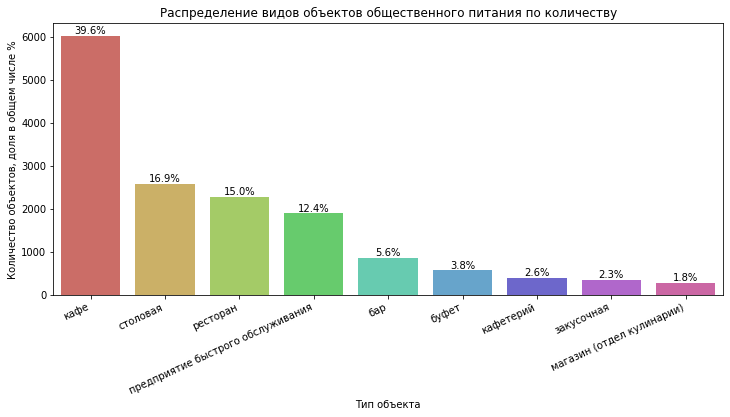

In [19]:
plt.figure(figsize=(12, 5))  
ax = sns.countplot(x= 'object_type',
                   data = data,
                   order = data['object_type'].value_counts().index, # сортровка
                   palette="hls") # использование палитры
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right") # вывод названий по оси "х" под углом
ax.set_title('Распределение видов объектов общественного питания по количеству')
ax.set_xlabel('Тип объекта')
ax.set_ylabel('Количество объектов, доля в общем числе %') 

# добавим доли каждого типа объекта для лучшего понимания распределения объектов
ncount = len(data)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom')
plt.show()

Большую долю рынка по количеству занимают заведения общественного питания с типом:
1. **кафе** 39.6%
2. **столовая** 16.9%
3. **ресторан** 15.0% 

Меньше всего заведений с типом *магазин* и *закусочная*.

### Исследование соотношения сетевых и несетевых заведений по количеству

In [20]:
chain_objects_count = data.groupby('chain').agg({'id': 'count'}).reset_index().sort_values(by='id', ascending=False)
chain_objects_count.columns = ['object_type','amount_objects']
chain_objects_count['ratio_objects,%'] = round(chain_objects_count['amount_objects'] * 100 / chain_objects_count['amount_objects'].sum(),2)
chain_objects_count

,object_type,amount_objects,"ratio_objects,%"
1,нет,12245,80.58
0,да,2951,19.42


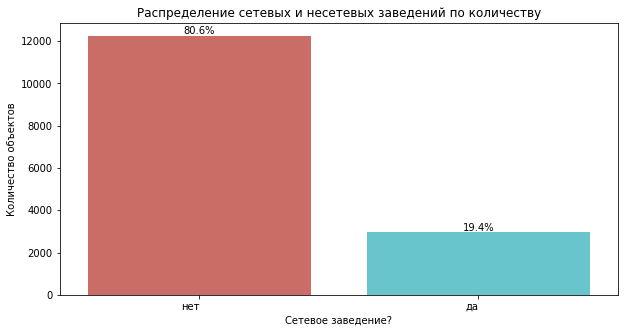

In [21]:
plt.figure(figsize=(10, 5)) 
ax = sns.barplot(x= 'object_type', y='amount_objects', data = chain_objects_count, palette="hls")
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
ax.set_title('Распределение сетевых и несетевых заведений по количеству')
ax.set(xlabel='Сетевое заведение?', ylabel='Количество объектов')

# добавим доли каждого типа объекта
ncount = len(data)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom')
plt.show()

На графике видно, что несетевых заведений по количеству больше, чем сетевых. 

Соотношение **несетевых** 80.68% к **сетевым** 19.32%, практически соотношение 4:1.

### Выявление для какого вида объекта общественного питания характерно сетевое распространение

In [22]:
chain_object = pd.pivot_table(data, values='id', index='object_type',columns='chain', aggfunc='count').reset_index()
chain_object['sum_chain_object'] = chain_object['да'] + chain_object['нет']
chain_object['ratio_chain,%'] = round(chain_object['да'] * 100 / chain_object['sum_chain_object'], 2)
chain_object = chain_object.sort_values(by='ratio_chain,%')
chain_object

chain,object_type,да,нет,sum_chain_object,"ratio_chain,%"
8,столовая,3,2572,2575,0.12
1,буфет,11,560,571,1.93
0,бар,37,816,853,4.34
4,кафетерий,51,342,393,12.98
2,закусочная,56,292,348,16.09
3,кафе,1389,4628,6017,23.08
7,ресторан,542,1734,2276,23.81
5,магазин (отдел кулинарии),78,194,272,28.68
6,предприятие быстрого обслуживания,784,1107,1891,41.46


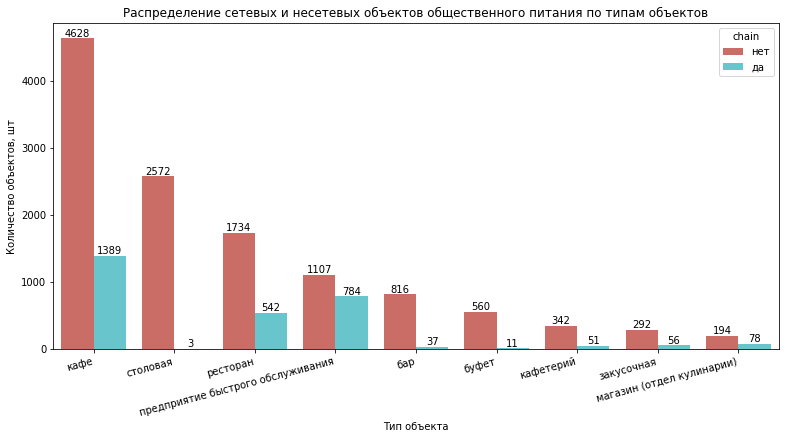

In [23]:
plt.figure(figsize=(13, 6))  
ax = sns.countplot(x= 'object_type', data = data,hue= 'chain', order = data['object_type'].value_counts().index, palette="hls")
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha="right")
ax.set_title('Распределение сетевых и несетевых объектов общественного питания по типам объектов')
ax.set(xlabel='Тип объекта', ylabel='Количество объектов, шт')
# добавим доли каждого типа объекта
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom')
plt.show()

Имеет смысл вывести два графика для ответа на вопрос о том для какого вида объекта общественного питания характерно сетевое распространение. На данном графике лучше видно *сколько сетевых заведений в каждом типе заведений и как они соотносятся*.


В следующем графике выведено сколько именно (их доля) сетевых заведений в каждом типе объектов. 

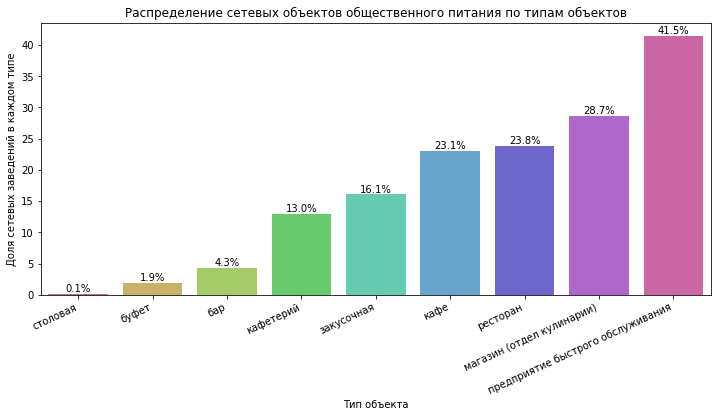

In [24]:
plt.figure(figsize=(12, 5)) 
ax = sns.barplot(x= 'object_type',
                 y='ratio_chain,%',
                 data = chain_object,
                 palette="hls")
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")
ax.set_title('Распределение сетевых объектов общественного питания по типам объектов')
ax.set(xlabel='Тип объекта', ylabel='Доля сетевых заведений в каждом типе')
ncount = len(chain_object)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(y), (x.mean(), y), 
            ha='center', va='bottom')
plt.show()

Сетевых заведений больше всего у таких типов заведений как:
1. **Предприятие быстрого обслуживания**(41.5% доля сетевых из общего количества заведений данного типа)
2. **магазин (отдел кулинарии)** (28.7%)
3. **ресторан** (23.8%)
4. **кафе** (23.1%)

### Определение какое из утверждений характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [25]:
data_chain = data.query('chain == "да"')[['id','object_name', 'object_type', 'number']]
data_chain.head()

,id,object_name,object_type,number
3,21894,ПИЦЦЕТОРИЯ,кафе,40
6,148815,Брусника,кафе,10
13,22579,Алло Пицца,кафе,32
16,144107,Суши Wok,предприятие быстрого обслуживания,7
18,58565,Тануки,ресторан,160


In [26]:
data_chain['number'].describe()

count    2951.000000
mean       53.011522
std        57.204941
min         0.000000
25%        15.000000
50%        40.000000
75%        72.000000
max       580.000000
Name: number, dtype: float64

In [27]:
chain_seat = pd.pivot_table(data_chain, values=['number', 'id'], index='object_name', aggfunc={'number': 'mean', 'id':'count'}).reset_index()
chain_seat

,object_name,id,number
0,Beverly Hills Diner,1,88.000000
1,Bierloga,1,75.000000
2,Black & White,1,40.000000
3,Bocconcino,3,66.666667
4,BooBo,1,46.000000
...,...,...,...
719,кафе «Папа Джонс»,1,24.000000
720,кафе «Старбакс»,2,63.500000
721,кафе «Шоколадница»,1,50.000000
722,ресторан «Брудер»,1,86.000000


<Figure size 432x432 with 0 Axes>

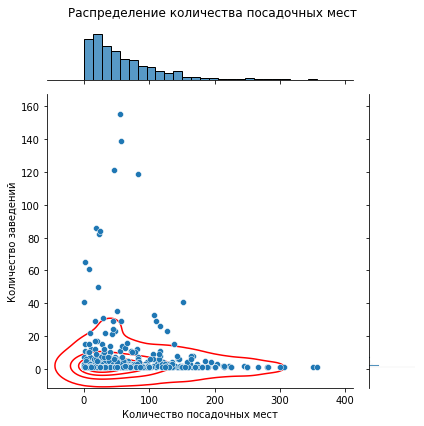

In [28]:
plt.figure(figsize=(6, 6))
pic=sns.jointplot(x='number', y='id', data=chain_seat).plot_joint(sns.kdeplot,zorder=0,n_levels=5, color='red')
pic.fig.suptitle("Распределение количества посадочных мест")
pic.fig.tight_layout()
pic.ax_joint.set_xlabel('Количество посадочных мест')
pic.ax_joint.set_ylabel('Количество заведений')
plt.show()

Поближе рассмотрим гистограмму распределения посадочных мест по заведениям

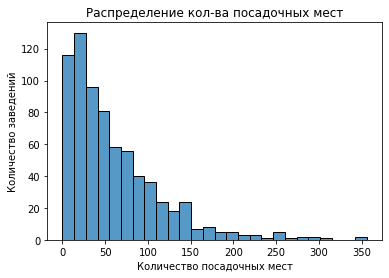

In [29]:
pic2 = sns.histplot(chain_seat['number']) 
pic2.set_title("Распределение кол-ва посадочных мест")
pic2.set_xlabel('Количество посадочных мест')
pic2.set_ylabel('Количество заведений')
plt.show()

На графике видно, что сетевых заведений у которых много посадочных мест достаточно мало.

В среднем у сетевых заведений 53 посадочных места, медианное значение 40 мест, т.е. половина общего числа всех сетевых заведений имеет меньше 40 посадочных мест. По гистограмме видно, что достаточно много заведений имеют около 20-30 посадочных мест. Из этого делаем вывод, что скорее всего к истине ближе выражение:

"Для сетевых заведений характерно много заведений с небольшим числом посадочных мест в каждом ".

### Рассчет для каждого вида объекта общественного питания среднего количества посадочных мест. 

Какой вид предоставляет в среднем самое большое количество посадочных мест?

In [30]:
type_object_seat = pd.pivot_table(data, values=['number', 'id'], index='object_type', aggfunc={'number': 'median', 'id':'count'}).reset_index()
type_object_seat.sort_values('number', ascending =False)

,object_type,id,number
8,столовая,2575,103
7,ресторан,2276,80
0,бар,853,35
1,буфет,571,32
3,кафе,6017,32
4,кафетерий,393,6
6,предприятие быстрого обслуживания,1891,6
2,закусочная,348,0
5,магазин (отдел кулинарии),272,0


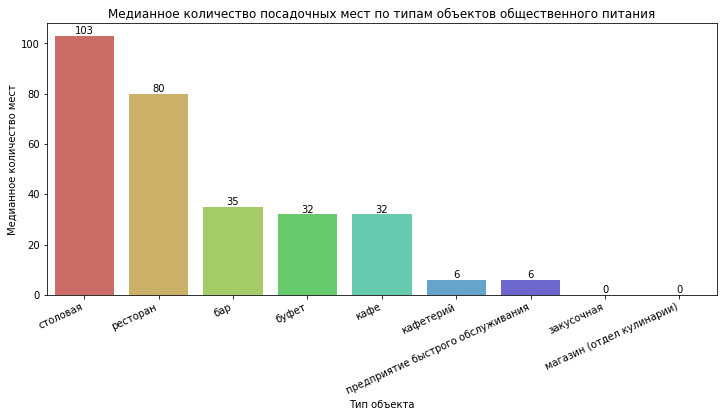

In [31]:
plt.figure(figsize=(12, 5)) 
ax = sns.barplot(x= 'object_type',
                 y='number',
                 data = type_object_seat.sort_values('number', ascending =False),
                 palette="hls")
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")
ax.set_title('Медианное количество посадочных мест по типам объектов общественного питания')
ax.set(xlabel='Тип объекта', ylabel='Медианное количество мест')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom')
plt.show()

Медианное количество посадочных мест больше всего у :
1. **Столовых** 103,
2. **Ресторанов** 80,
3. **Бар** 35,
4. **Буфет** 32,
5. **Кафе** 32

### Выделение в отдельный столбец информацию об улице из столбца address .

In [32]:
pd.options.mode.chained_assignment = None  # убираем красные окошки


street_other = ['улица', 'проспект', 'переулок', 'бульвар',  'шоссе', 'проезд',
                'набережная', 'площадь', 'аллея', 'линия', 'квартал']
def find_str (address):
    for address_part in address.split(', '): # разделяем адреса по знаку запятой с пробелом
        for street in street_other: # через цикл ищем нужные части адреса
            if address_part.find(street)!= -1: # ищем, где метод find() покажет, что список альтернативных названий "улицы" есть в строке
                return address_part 

data['street'] = data['address'].apply(find_str)
data = data[~(data['street'].isnull())] # удалим 392 строки, где улицы не указаны 
data

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15359,222077,Кофейня «Шоколадница»,да,кафе,"город Москва, Кантемировская улица, дом 47",72,Кантемировская улица
15360,219759,Шоколадница,да,кафе,"город Москва, улица Вавилова, дом 3",36,улица Вавилова
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал


### Топ-10 улиц по количеству объектов общественного питания. 

И в каких районах Москвы находятся эти улицы.

Так как новое заведение будет располагаться в Москве и вопрос заказчика касается районов Москвы, логичнее будет удалить другие поселения и города для определения топ-10 улиц по количеству объектов общественного питания (этот вопрос лучше уточнить у заказчика).

In [33]:
data =data[~data.street.str.contains("поселение")]
data =data[~data.street.str.contains("город")]
data =data[~data.street.str.contains("дом")]
data

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15359,222077,Кофейня «Шоколадница»,да,кафе,"город Москва, Кантемировская улица, дом 47",72,Кантемировская улица
15360,219759,Шоколадница,да,кафе,"город Москва, улица Вавилова, дом 3",36,улица Вавилова
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал


In [34]:
top10_street = data.pivot_table(index='street', values='id', aggfunc='count').reset_index().sort_values(by='id',ascending=False).head(10)
top10_street

,street,id
1406,проспект Мира,197
1001,Профсоюзная улица,181
678,Ленинградский проспект,172
985,Пресненская набережная,165
395,Варшавское шоссе,164
681,Ленинский проспект,148
1402,проспект Вернадского,127
668,Кутузовский проспект,114
593,Каширское шоссе,110
600,Кировоградская улица,107


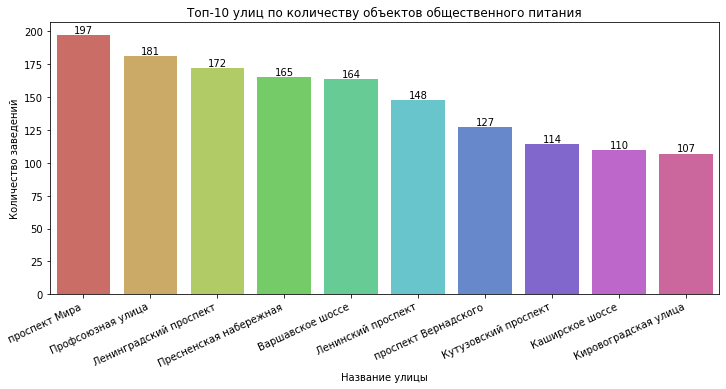

In [35]:
plt.figure(figsize=(12, 5)) 
ax = sns.barplot(x= 'street',
                 y='id',
                 data = top10_street,
                 palette="hls")
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")
ax.set_title('Топ-10 улиц по количеству объектов общественного питания')
ax.set(xlabel='Название улицы', ylabel='Количество заведений')
ncount = len(type_object_seat)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom')
plt.show()

Для определения района воспользуемся открытой информацией с портала открытых данных правительства Москвы (данные заранее урезаны до двух столбцов).

In [36]:
from io import BytesIO
import requests
spreadsheet_id = '1o4uAr2yJrIXXorGY-xlYYAIvd_W_EmgR-mMHLtDFlrY'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df_district = pd.read_csv(BytesIO(r.content))
df_district.head()

,district,address
0,Ярославский район,"город Москва, улица Егора Абакумова, дом 9"
1,Таганский район,"город Москва, улица Талалихина, дом 2/1, корпус 1"
2,Таганский район,"Российская Федерация, город Москва, внутригоро..."
3,район Лианозово,"город Москва, Угличская улица, дом 17"
4,район Арбат,"город Москва, переулок Сивцев Вражек, дом 6/2"


In [37]:
# Соединим наш датасет с датасетом с районами
data_with_district = data.merge(df_district, on='address', how='left')
data_with_district

,id,object_name,chain,object_type,address,number,street,district
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,Ярославский район
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,Таганский район
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,NaN
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица,район Лианозово
4,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица,район Лианозово
...,...,...,...,...,...,...,...,...
79156,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,Киевское шоссе,поселение Московский
79157,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,Киевское шоссе,поселение Московский
79158,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,Киевское шоссе,поселение Московский
79159,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,Киевское шоссе,поселение Московский


In [38]:
# Так как число строк заметно увеличилось, определим сколько у нас появилось дубликатов
data_with_district.duplicated().sum()

64304

In [39]:
# Удалим дубликаты 
data_with_district = data_with_district.drop_duplicates(keep='first')
data_with_district.duplicated().sum()

0

In [40]:
# Посмотрим на результаты нашего труда
data_with_district

,id,object_name,chain,object_type,address,number,street,district
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,Ярославский район
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,Таганский район
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,NaN
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица,район Лианозово
5,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица,район Лианозово
...,...,...,...,...,...,...,...,...
79105,222077,Кофейня «Шоколадница»,да,кафе,"город Москва, Кантемировская улица, дом 47",72,Кантемировская улица,район Царицыно
79112,219759,Шоколадница,да,кафе,"город Москва, улица Вавилова, дом 3",36,улица Вавилова,Донской район
79125,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок,Таганский район
79130,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал,Басманный район


In [42]:
# Присоединим к нашей изначальной таблице районы и удалим дубликаты
top10_street_new = top10_street.merge(data_with_district[['street','district']], on='street', how='left')
top10_street_new = top10_street_new.drop_duplicates(keep='first')
top10_street_new

,street,id,district
0,проспект Мира,197,Мещанский район
5,проспект Мира,197,NaN
16,проспект Мира,197,Останкинский район
20,проспект Мира,197,Алексеевский район
37,проспект Мира,197,район Ростокино
79,проспект Мира,197,район Свиблово
197,Профсоюзная улица,181,NaN
199,Профсоюзная улица,181,Академический район
205,Профсоюзная улица,181,район Черёмушки
210,Профсоюзная улица,181,район Тёплый Стан


In [43]:
# В итоге получаем таблицу с районами, в которых находятся, интересующие нас улицы
top10_street_new.groupby('district').agg({'street':'count'}).sort_values(by='street',ascending=False)

,street
district,
район Чертаново Северное,2
Обручевский район,2
район Проспект Вернадского,2
район Тропарёво-Никулино,2
район Тёплый Стан,2
район Чертаново Центральное,2
район Чертаново Южное,2
район Нагатино-Садовники,2
Ломоносовский район,2


In [44]:
# Добавим информацию сколько районов пересекает каждая улица и количество заведений на ней.
top10_street_new.pivot_table(index='street', values=['id', 'district'], aggfunc={'id': 'mean','district':'count'}).sort_values(by='id', ascending=False)

,district,id
street,,
проспект Мира,5,197
Профсоюзная улица,6,181
Ленинградский проспект,4,172
Пресненская набережная,1,165
Варшавское шоссе,9,164
Ленинский проспект,8,148
проспект Вернадского,5,127
Кутузовский проспект,3,114
Каширское шоссе,4,110


Список улиц по количеству заведений и районов:

Улица	| Количество пересекаемых районов | Количество заведений
--------|-|-----------
проспект Мира | 5	| 197
Профсоюзная улица | 6  | 181
Ленинградский проспект | 4	| 172
Пресненская набережная | 1	| 165
Варшавское шоссе | 9	| 164
Ленинский проспект | 8	| 148
проспект Вернадского | 5	| 127
Кутузовский проспект | 3	| 114
Каширское шоссе	|  4 | 110
Кировоградская улица | 3	| 107

ТОП-10 районов, где расположены данные улицы:

* район Чертаново Северное	
* Обручевский район	
* район Проспект Вернадского	
* район Тропарёво-Никулино	
* район Тёплый Стан	
* район Чертаново Центральное
* район Чертаново Южное	
* район Нагатино-Садовники	
* Ломоносовский район	
* Донской район

По количеству районов, которые пересекают данные улицы можно сказать, что улицы имеют большую протяженность, также скорее всего у них высокая проходимость, этим обусловлено большое число заведений и соответственно попадание данных улиц в топ по количеству заведений. 

Также большинство популярных районов (все) расположено между третьим транспортным кольцом и московской кольцевой автомобильной дорогой на юге, юго-западе и юго-востоке от центра Москвы.

### Определение числа улиц с одним объектом общественного питания. 

И в каких районах Москвы находятся эти улицы.

In [45]:
# Создадим список улиц с одним объектом общественного питания
one_street = data.pivot_table(index='street', values='id', aggfunc='count').reset_index().sort_values(by='id',ascending=False)
one_street = one_street.query('id == 1')
one_street

,street,id
39,1-й Спасоналивковский переулок,1
45,1-й проезд Марьиной Рощи,1
42,1-й Тушинский проезд,1
35,1-й Саратовский проезд,1
36,1-й Сельскохозяйственный проезд,1
...,...,...
1323,Юрловский проезд,1
525,Жуков проезд,1
1328,Якиманский переулок,1
1330,Ялтинская улица,1


In [46]:
# Добавим к списку объектов районы, удалим будликаты
one_street_district = one_street.merge(data_with_district[['street','district']], on='street', how='left')
one_street_district = one_street_district.drop_duplicates(keep='first')
one_street_district

,street,id,district
0,1-й Спасоналивковский переулок,1,NaN
1,1-й проезд Марьиной Рощи,1,район Марьина Роща
2,1-й Тушинский проезд,1,район Покровское-Стрешнево
3,1-й Саратовский проезд,1,NaN
4,1-й Сельскохозяйственный проезд,1,район Ростокино
...,...,...,...
537,Юрловский проезд,1,NaN
538,Жуков проезд,1,NaN
539,Якиманский переулок,1,район Якиманка
540,Ялтинская улица,1,NaN


In [47]:
# Количество районов, в которых расположены улицы с одним объектом общественного питания
one_street_district['district'].nunique()

99

In [48]:
# Получим список районов, в которых расположены улицы с одним объектом общественного питания
one_street_district['district'].unique()

array([nan, 'район Марьина Роща', 'район Покровское-Стрешнево',
       'район Ростокино', 'район Аэропорт', 'Алексеевский район',
       'район Раменки', 'район Хорошёво-Мнёвники', 'район Капотня',
       'район Фили-Давыдково', 'поселение Троицк', 'Красносельский район',
       'поселение Щаповское', 'район Внуково', 'Тимирязевский район',
       'Тверской район', 'район Кузьминки', 'район Якиманка',
       'Мещанский район', 'район Солнцево', 'район Свиблово',
       'район Преображенское', 'район Кунцево', 'район Сокольники',
       'район Замоскворечье', 'район Богородское', 'район Арбат',
       'Бутырский район', 'район Северное Бутово', 'Басманный район',
       'Таганский район', 'район Южное Бутово', 'поселение Десеновское',
       'Пресненский район', 'район Хамовники', 'район Косино-Ухтомский',
       'Войковский район', 'Хорошёвский район', 'район Печатники',
       'поселение Сосенское', 'Донской район', 'Останкинский район',
       'район Щукино', 'район Лефортово', 'райо

In [49]:
# Самые популярные районы топ-10
one_street_district.pivot_table(index='district', values='street', aggfunc='count').sort_values(by='street',ascending=False).head(10)

,street
district,
Таганский район,18
Тверской район,15
район Хамовники,15
Пресненский район,15
Басманный район,15
район Южное Бутово,9
Мещанский район,8
район Арбат,8
Можайский район,8


Таким образом всего мы получили 542 улицы с одним объектом общественного питания. 
Количество районов, в которых расположены улицы с одним объектом общественного питания - 99.
Самый популярные районы на которых находятся по одному заведению находятся в центре (до 3-го кольца): 

* **Таганский район**	18
* **Тверской район**	15
* **район Хамовники**	15
* **Пресненский район**	15
* **Басманный район**	15

Из остального списка только **район Южное Бутово** и **Можайский район** находятся не около центра. 

### Общий вывод и рекомендации

1 .Большую долю рынка по количеству занимают заведения общественного питания с типом:

1. **кафе** 39.6%
2. **столовая** 16.9%
3. **ресторан** 15.0%

Меньше всего заведений с типом магазин и закусочная.

2 . Несетевых заведений по количеству больше, чем сетевых.

Соотношение **несетевых** 80.68% к **сетевым** 19.32%, практически соотношение 4:1.

3 . Сетевых заведений больше всего у таких типов заведений как:
1. **Предприятие быстрого обслуживания**(41.5% доля сетевых из общего количества заведений данного типа)
2. **магазин (отдел кулинарии)** (28.7%)
3. **ресторан** (23.8%)
4. **кафе** (23.1%)

4 . В среднем у сетевых заведений 53 посадочных места, медианное значение 40 мест, т.е. половина общего числа всех сетевых заведений имеет меньше 40 посадочных мест. По гистограмме видно, что достаточно много заведений имеют около 20-30 посадочных мест. Из этого делаем вывод, что скорее всего к истине ближе выражение:

"Для сетевых заведений характерно много заведений с небольшим числом посадочных мест в каждом ".

5 . Среди всех объектов общественного питания медианное количество посадочных мест больше всего у :
1. **Столовых** 103,
2. **Ресторанов** 80,
3. **Бар** 35,
4. **Буфет** 32,
5. **Кафе** 32

6 . Список улиц по количеству заведений и районов:

Улица	| Количество пересекаемых районов | Количество заведений
--------|-|-----------
проспект Мира | 5	| 197
Профсоюзная улица | 6  | 181
Ленинградский проспект | 4	| 172
Пресненская набережная | 1	| 165
Варшавское шоссе | 9	| 164
Ленинский проспект | 8	| 148
проспект Вернадского | 5	| 127
Кутузовский проспект | 3	| 114
Каширское шоссе	|  4 | 110
Кировоградская улица | 3	| 107

ТОП-10 районов, где расположены данные улицы:

* район Чертаново Северное	
* Обручевский район	
* район Проспект Вернадского	
* район Тропарёво-Никулино	
* район Тёплый Стан	
* район Чертаново Центральное
* район Чертаново Южное	
* район Нагатино-Садовники	
* Ломоносовский район	
* Донской район

По количеству районов, которые пересекают данные улицы можно сказать, что улицы имеют большую протяженность, также скорее всего у них высокая проходимость, этим обусловлено большое число заведений и соответственно попадание данных улиц в топ по количеству заведений. 

Также большинство популярных районов (все) расположено между третьим транспортным кольцом и московской кольцевой автомобильной дорогой на юге, юго-западе и юго-востоке от центра Москвы.

Также в Москве 542 улицы с одним объектом общественного питания. 
Количество районов, в которых расположены улицы с одним объектом общественного питания - 99.
Самый популярные районы на которых находятся по одному заведению находятся в центре (до 3-го кольца): 

* **Таганский район**	18
* **Тверской район**	15
* **район Хамовники**	15
* **Пресненский район**	15
* **Басманный район**	15

Из остального списка только **район Южное Бутово** и **Можайский район** находятся не около центра. 

Рекомендации:

**ТИП ЗАВЕДЕНИЯ.** 

Для открытия первого заведения можно рассматривать тип заведения "кафе", такие заведения занимают большую долю рынка по количеству объектов (39%), что свидетельствует о том, что они пользуются у населения большей популярностью. 

Мы не рассматриваем тип "столовая", потому что первоначально речь была о кафе и в столовых как известно официантов может и не быть (а куда же тогда нам деть наших роботов?). 

Уклон ресторана скорее всего на шеф-повара и уникальность его блюд, а не на официантов и их обслуживание. Опять же возможно это то, что не хватает новому кафе, чтобы удержать клиентов после того, как они насмотрятся на роботов. К тому же рестораны занимают 15% доли рынка, что является третьим местом по количеству объектов питания. 

У заказчиков были вопросы про сетевые заведения, можно предположить, что новое открывающиеся заведение в дальнейшем планируется стать сетью или просто рассматривается такой вариант.  Тогда следует обратить внимание на такой тип заведения как "предприятие быстрого обслуживания", так как процент сетевых заведений у этого типа объектов максимальный 41.5%. 

**КОЛИЧЕСТВО МЕСТ** 

Для сетевых заведений характерно много заведений с небольшим числом посадочных мест в каждом, зачастую это 20-30 посадочных мест.

Среди всех объектов общественного питания среднее количество посадочных мест больше всего у:
1. **Столовых** 103,
2. **Ресторанов** 80,
3. **Бар** 35,
4. **Буфет** 32,
5. **Кафе** 32

Если рассматривать тип "кафе", то это в среднем 39 посадочных мест. 

**РАЙОН РАСПОЛОЖЕНИЯ**

Имеет смысл открыть заведение в районах, где располагается большое количество других заведений (так как они явно там по причине большой проходимости). Это такие районы как:
* район Чертаново Северное	
* Обручевский район	
* район Проспект Вернадского	
* район Тропарёво-Никулино	
* район Тёплый Стан	
* район Чертаново Центральное
* район Чертаново Южное	
* район Нагатино-Садовники	
* Ломоносовский район	
* Донской район

Презентация (я не смогла удержаться и сделала её вырвиглазной, потому что никогда такие не делала)))): https://disk.yandex.ru/i/a6UVUcRlOzjG_w